# Cross Validation
## Validation

- 隨機資料對半分成訓練集(train set)和驗證集(validation set)
- 配適線性模型 mpg 對 horsepower 多項式
- 不同多項式的 validation error 畫出

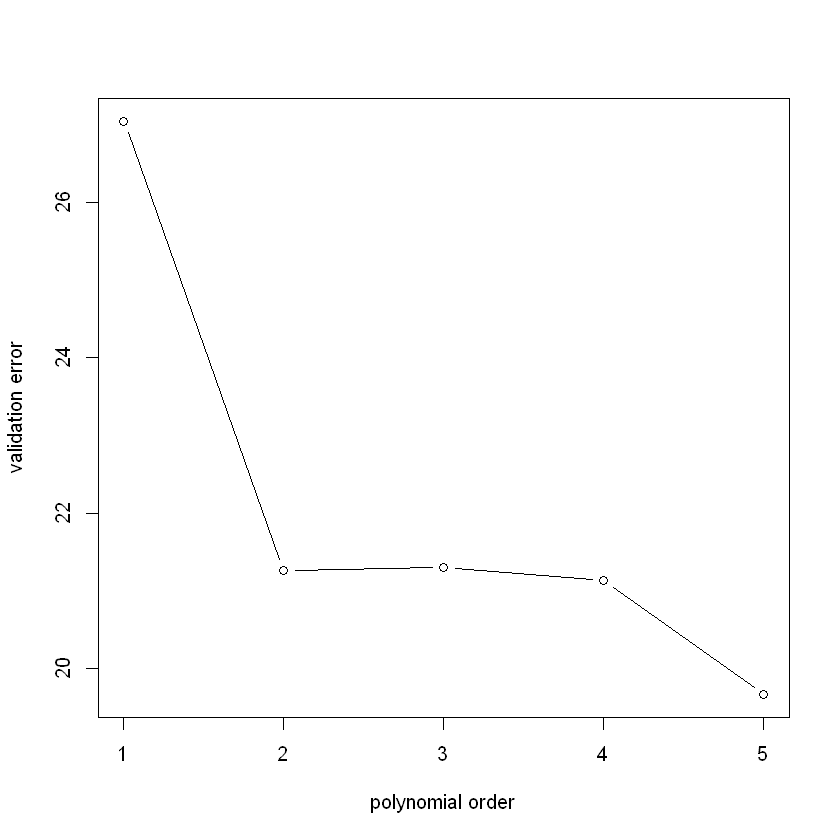

In [1]:
library(ISLR)
set.seed(1)
train=sample(392 ,196)
poly_validation_error=rep(0,5);
mpg=Auto$mpg
for(i in 1:5){
    lm.fit=lm(mpg~poly(horsepower ,i) ,data=Auto ,subset =train )
    validation_pred=predict(lm.fit,Auto[-train,])
    validation_mpg=mpg[-train]
    poly_validation_error[i]=mean((validation_mpg-validation_pred)[-train]^2)
}
plot(1:5,poly_validation_error,xlab="polynomial order",ylab="validation error",type="b")

- 隨機分成訓練和測試集的結果，會影響 validation error 
- 重複不同的驗證集，能得出不同的 validation error
- 缺點: validation error 的結果不太穩定

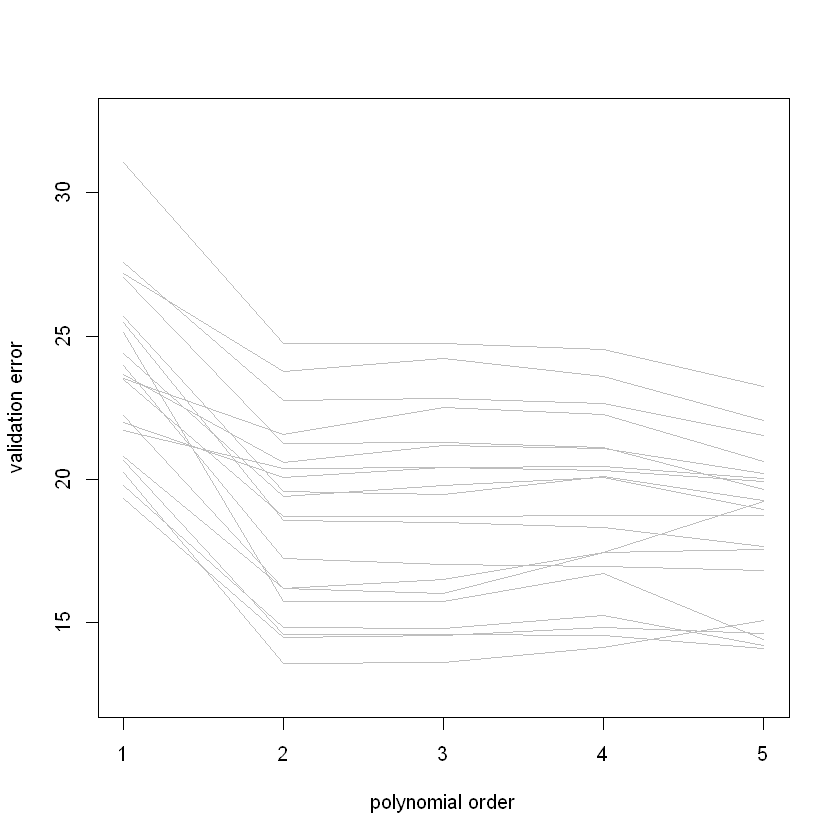

In [2]:
library(ISLR)
for(tmp_seed in 1:20){
    set.seed(tmp_seed)
    train=sample(392 ,196)
    poly_validation_error=rep(0,5);
    mpg=Auto$mpg
    for(i in 1:5){
        lm.fit=lm(mpg~poly(horsepower ,i) ,data=Auto ,subset =train )
        validation_pred=predict(lm.fit,Auto[-train,])
        validation_mpg=mpg[-train]
        poly_validation_error[i]=mean((validation_mpg-validation_pred)[-train]^2)
    }
    if(tmp_seed==1){
        plot(1:5,poly_validation_error,xlab="polynomial order",ylab="validation error",type="l",col="grey",ylim=c(12.5,32.5))
    }else{
        lines(1:5,poly_validation_error,col="grey")
    }
}


## Leave-One-Out Cross Validation(LOOCV)
- 同樣配適線性模型 mpg 對 horsepower 多項式
- 不同多項式的 loocv error 畫出
- 優點: 結果穩定，只有單一值
- 缺點: 計算相比 validation 耗時

[1] 5

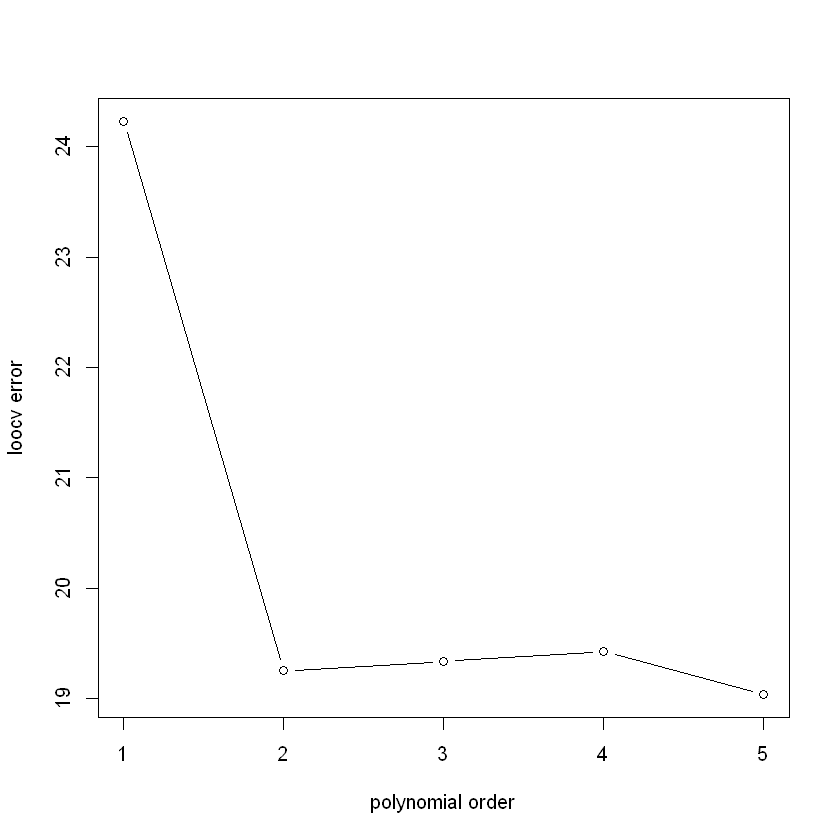

In [3]:
library(boot)
loocv.err=rep(0,5)
for(i in 1:5){
    glm.fit=glm(mpg~poly(horsepower,i) ,data=Auto)
    loocv.err[i]=cv.glm(Auto,glm.fit)$delta[1]
}
plot(1:5,loocv.err,xlab="polynomial order",ylab="loocv error",type="b")
which.min(loocv.err)

## K-fold Cross Validation ( K-fold CV )
- 選定 K=10,隨機將資料分割成 10 組
- 同樣配適線性模型 mpg 對 horsepower 多項式
- 不同多項式的 K-fold CV error 畫出

[1] 5

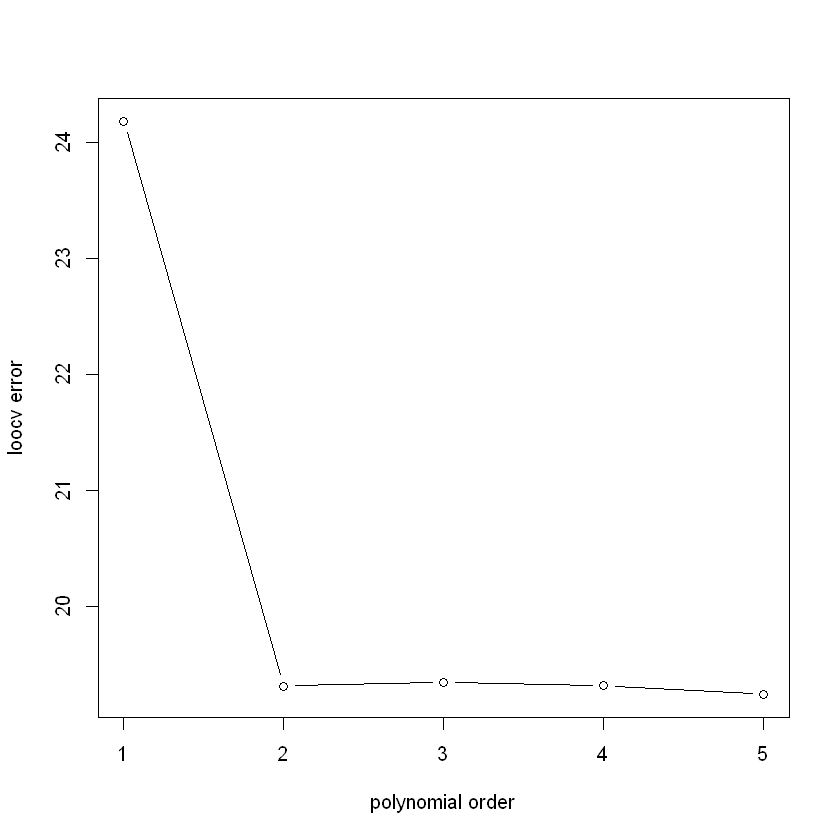

In [4]:
k.cv.err=rep(0,5)
for(i in 1:5){
    glm.fit=glm(mpg~poly(horsepower,i) ,data=Auto)
    k.cv.err[i]=cv.glm(Auto,glm.fit,K=10)$delta[1]
}
plot(1:5,k.cv.err,xlab="polynomial order",ylab="loocv error",type="b")
which.min(k.cv.err)

- 同樣，隨機分割的結果，會影響 K-fold CV error 
- 重複不同的分割，能得出不同的 K-fold CV error
- 從圖中能觀察 K-fold CV error 結果較 validation 穩定
- 同時 K-fold CV error 耗時也比 loocv 少

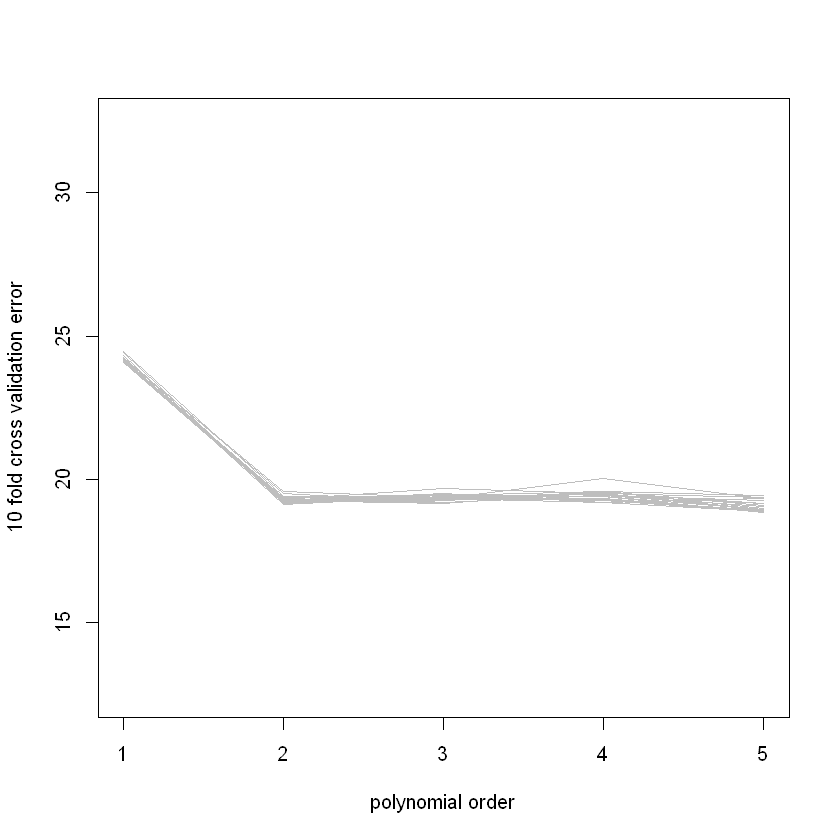

In [5]:
library(ISLR)
for(tmp_seed in 1:20){
    set.seed(tmp_seed)
    k.cv.err=rep(0,5)
    for(i in 1:5){
        glm.fit=glm(mpg~poly(horsepower,i) ,data=Auto)
        k.cv.err[i]=cv.glm(Auto,glm.fit,K=10)$delta[1]
    }
    if(tmp_seed==1){
        plot(1:5,k.cv.err,xlab="polynomial order",ylab="10 fold cross validation error",type="l",col="grey",ylim=c(12.5,32.5))
    }else{
        lines(1:5,k.cv.err,col="grey")
    }
}